In [1]:
import pandas as pd
import numpy as np
import pyodbc  
from datetime import datetime 
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
import seaborn as sns
import collections
import warnings
warnings.filterwarnings('ignore')
from dateutil.relativedelta import relativedelta
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from statsmodels.tsa.stattools import adfuller # stationary or not 
from statsmodels.stats.diagnostic import acorr_ljungbox # white noise test
from statsmodels.tsa.stattools import arma_order_select_ic # AIC BIC
import statsmodels.api as sm # predict
from scipy import  stats
from statsmodels.graphics.api import qqplot
from sklearn.metrics import mean_squared_error
from math import sqrt
import itertools
from sklearn.metrics import r2_score
from statsmodels.tsa.arima_model import ARIMA
from fbprophet import Prophet
import warnings
warnings.filterwarnings('ignore')

In [16]:
from TimeSeries_py import *

In [17]:
def main():
    
    """ """
if __name__ == "__main__":
    main()

In [4]:
conn = pyodbc.connect("Driver={ODBC Driver 13 for SQL Server};Server=yetidb01.database.windows.net;database=YETISQLDW01;uid=htian;PWD=HeLeNtIAn52!")
cursor = conn.cursor()

In [5]:
DF = pd.read_sql("SELECT S.CustomerID, C.Customer, S.OrderDate, S.Requested_Date, S.SalesOffice, S.OrderQty, P.ProductCategory, P.MasterSKU,S.sourcesystem FROM EDW_DS.ORDERFCT S  inner join [EDW_DS].[PRODUCT_DIM] P ON P.ProductID = S.ProductID  left join EDW_DS.CUSTOMER_DIM C on S.CustomerID = C.CustomerID WHERE P.ISCORE = 'TRUE' and S.SalesOffice in ('STD','HYB')  and S.RejectionReason is null and S.Ordertype Not in ('ZARF','ZARM','ZEG2','ZERF','ZERM','ZRE') and S.SoldtoParty not in ('91860','0000107894','0000114883','0000108654') and S.OrderQty>0" , conn)

In [ ]:
# choose time interval and cut off time

In [6]:
begin = pd.to_datetime('2014-01-01')    # your begin time for training

In [7]:
end = pd.to_datetime('2018-05-31')      # your end time for testing

In [8]:
cut = pd.to_datetime('2017-05-31')      # your cut off time (to split data as training and testing)

In [9]:
time_series(DF, begin, cut, end, 'Tundra 45',  'ARIMA', False)

The number of stable STD is: 1587
ARIMA model result with overall segment method: 
The ARIMA order value for class 0 is: ARIMA(1, 1, 2)
The ARIMA order value for class 1 is: ARIMA(6, 0, 3)
The ARIMA order value for class 2 is: ARIMA(6, 0, 0)
ARIMA Model result:  44.46 %
None
ARIMA model result with ProductCategory segment method: 
The ARIMA order value for class 0 is: ARIMA(1, 1, 2)
The ARIMA order value for class 1 is: ARIMA(1, 1, 1)
The ARIMA order value for class 2 is: ARIMA(7, 0, 1)
ARIMA Model result:  45.46 %
None
ARIMA model result without segment: 
The ARIMA order value for class 0 is: ARIMA(4, 1, 0)
ARIMA Model result:  42.23 %
None


In [ ]:
# you can out put the detail information of time series model

In [ ]:
# for example the best ARIMA model for Tundra 45, class 0, without segment is ARIMA(1, 1, 2)

The number of stable STD is: 1587
QQ plot of residuals (should be like a straight line)
######################
result of residual's white noice testing (should be very large)
stat                  | p-value
[0.04337966] |
[0.83501204] |
######################
######################
mean squared error:  1119.63604534044
######################
Date
2017-06-01      6.369575
2017-07-01     16.198513
2017-08-01     64.216546
2017-09-01     38.660465
2017-10-01     24.269518
2017-11-01      1.357059
2017-12-01     55.007213
2018-01-01    122.603396
2018-02-01     63.330650
2018-03-01     53.582835
2018-04-01     44.859251
2018-05-01     55.472590
dtype: float64
average MAPE:  45.49396764843333 %
If MAPE is "Inf", it because the test data contains 0
######################
Date
2017-06-01     6.172978
2017-07-01    14.984851
2017-08-01    94.586702
2017-09-01    47.924353
2017-10-01    27.621296
2017-11-01     1.347913
2017-12-01    43.141692
2018-01-01    76.008745
2018-02-01    48.099718
201

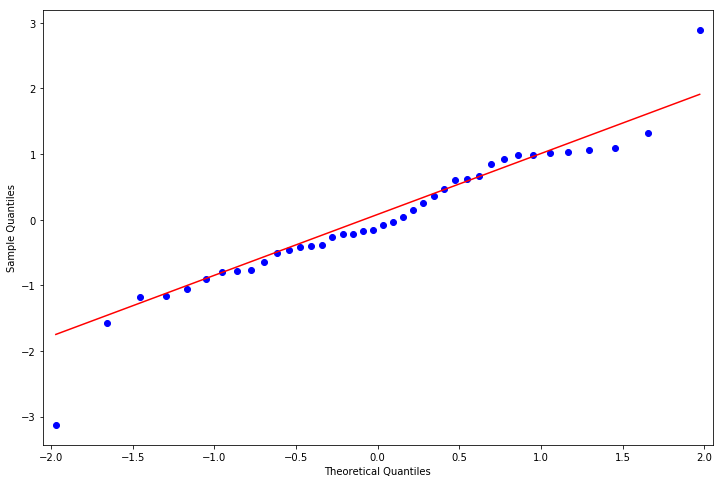

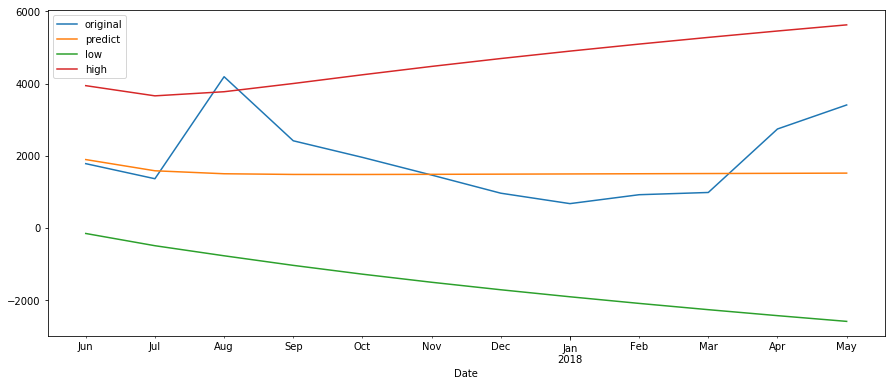

In [10]:
Plot('Tundra 45', 'ARIMA',(1, 1, 2), 'ProductCategory', DF,0, begin, end, cut)

In [ ]:
# you can do predict after getting the best Model result

In [ ]:
# for example, we already have the Tundra 45, Product category segment ARIMA result:
# ARIMA(1, 1, 2); ARIMA(1, 1, 1); ARIMA(7, 0, 1)
# Just combine all order value to the same list and take it to the prediction function
# do not forget to enter number of predictions you want (this tine: 5 month order quantity prediction)

In [18]:
Prediction('Tundra 45', 'ARIMA', [(1, 1, 2),(1, 1, 1),(7, 0, 1)], 'ProductCategory', DF, begin, end, cut, 5)

The number of stable STD is: 1587


[3187.878880443869,
 3385.3068106003684,
 3360.341349031203,
 3407.7792622384172,
 3308.027008944302]